In [1]:
%pylab inline

from skimage import exposure
from skimage import data
from skimage import color

Populating the interactive namespace from numpy and matplotlib


In [2]:
img = color.rgb2gray(data.lena())

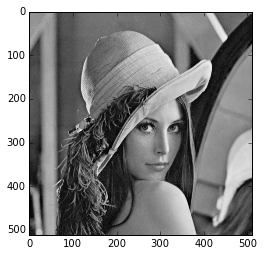

In [3]:
plt.imshow(img,cmap='gray')

In [4]:
# qualcheappunto
first_fft = np.fft.fftshift(np.fft.fft2(img))

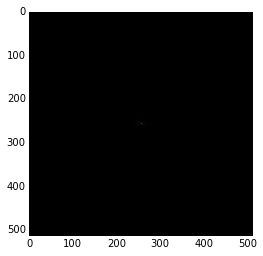

In [5]:
plt.imshow(np.abs(first_fft), cmap='gray')

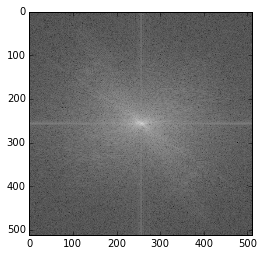

In [6]:
plt.imshow(np.log(np.abs(first_fft)), cmap='gray')

In [7]:
def ideal2d_low_pass(shape, f, pxd=1):
    """Designs an ideal filter with cutoff frequency f. pxd defines the number
   of pixels per unit of frequency (e.g., degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = np.ones(shape)
    filt[radius>f] = 0
    return filt

In [8]:
filtro = ideal2d_low_pass(img.shape,10)

In [9]:
plt.imshow(filtro,cmap='gray')

In [10]:
response_fft = first_fft * filtro

In [11]:
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(response_fft)))

In [12]:
plt.imshow(new_image,cmap='gray')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


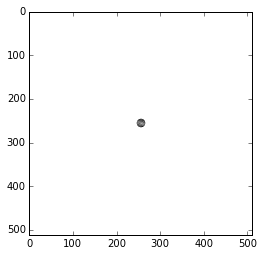

In [13]:
plt.imshow(np.log(np.abs(response_fft)), cmap='gray')

In [14]:
filtro2 = ideal2d_low_pass(img.shape,100)

In [15]:
filtro2 = 1-filtro2

In [16]:
plt.imshow(filtro2,cmap='gray')

In [17]:
response_fft2 = first_fft * filtro2

In [18]:
new_image2 = np.abs(np.fft.ifft2(np.fft.ifftshift(response_fft2)))

In [19]:
plt.imshow(new_image2,cmap='gray')

In [20]:
plt.imshow(np.log(np.abs(response_fft2)), cmap='gray')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [21]:
def butter2d_lp(shape, f, n, pxd=1):
    """Designs an n-th order lowpass 2D Butterworth filter with cutoff
   frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
   degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = 1 / (1.0 + (radius / f)**(2*n))
    return filt

In [22]:
filtro_butter = butter2d_lp(img.shape,10,2)

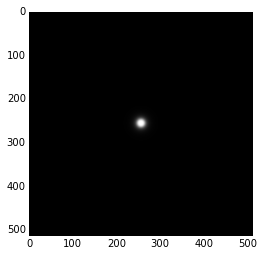

In [23]:
plt.imshow(filtro_butter,cmap='gray')

In [24]:
response_to_butter = first_fft * filtro_butter

In [25]:
new_image_butterFiltered = np.abs(np.fft.ifft2(np.fft.ifftshift(response_to_butter)))

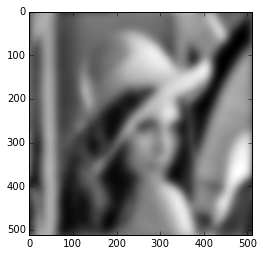

In [26]:
plt.imshow(new_image_butterFiltered,cmap='gray')

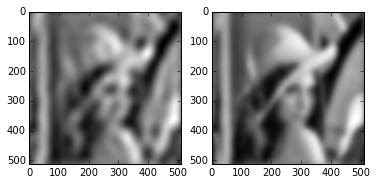

In [29]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(new_image, cmap=cm.gray)
axarr[1].imshow(new_image_butterFiltered, cmap='gray')

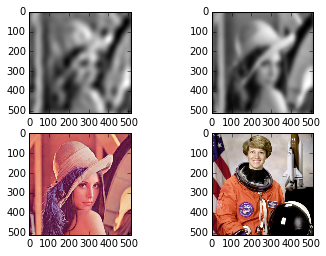

In [32]:
f, axarr2 = plt.subplots(2,2)
axarr2[0,0].imshow(new_image, cmap=cm.gray)
axarr2[0,1].imshow(new_image_butterFiltered, cmap='gray')
axarr2[1,0].imshow(data.lena())
axarr2[1,1].imshow(data.astronaut())